# Customer Segmentation

### Life cycle of Machine Learning Project
- Understanding the problem statement
- Importing the data
- Univariate Analysis
- Bivariate Analysis
- Detection Of Outliers

## Problem Statement:
- Analyze the customer dataset using unsupervised learning techniques to identify customer segments and provide recommendations for targeted marketing strategies.


## Dataset Description

- CustomerID: Unique ID assigned to the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Annual Income (k$): Annual Income of the customer
- Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature


## Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('E:/CustomerSegmentation/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Statistics of Data


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



The statistics describe the basic statistical properties of the "Age," "Annual Income," and "Spending Score" columns. Here's an interpretation of each statistic:

#### Count:

The number of rows in the dataset are 200

#### Mean (Average):

For "Age", the average age of customers is approximately 38.85 years.

For "Annual Income", the average annual income is approximately $60.56,000.

For "Spending Score", the average spending score is approximately 50.20.

#### Standard Deviation:Measures the amount of variation or dispersion in a set of values.

For "Age", the standard deviation is approximately 13.97.

For "Annual Income", the standard deviation is approximately $26.26,000.

For "Spending Score", the standard deviation is approximately 25.82.

#### Min:The smallest value in the dataset.

For "Age", the minimum age is 18.

For "Annual Income", the minimum annual income is $15,000.

For "Spending Score", the minimum spending score is 1.

#### 25th Percentile (Q1):Also known as the first quartile, it represents the value below which 25% of the data falls.

For "Age", the 25th percentile age is approximately 28.75.

For "Annual Income",the 25th percentile income is approximately $41,500.

For "Spending Score", the 25th percentile spending score is approximately 34.75.

#### 50th Percentile (Median):Also known as the second quartile, it represents the median value in the dataset.

For "Age", the median age is 36.

For "Annual Income", the median income is approximately $61,500.

For "Spending Score", the median spending score is 50.

#### 75th Percentile (Q3):Also known as the third quartile, it represents the value below which 75% of the data falls.

For "Age", the 75th percentile age is approximately 49.

For "Annual Income", the 75th percentile income is approximately $78,000.

For "Spending Score", the 75th percentile spending score is approximately 73.

#### Max (Maximum):The largest value in the dataset.

For "Age", the maximum age is 70.

For "Annual Income", the maximum annual income is $137,000.

For "Spending Score", the maximum spending score is 99.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Check for missing values

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Check for Duplicated Records

In [7]:
data.duplicated().sum()

0

There is no duplicated data

## Univariate Analysis

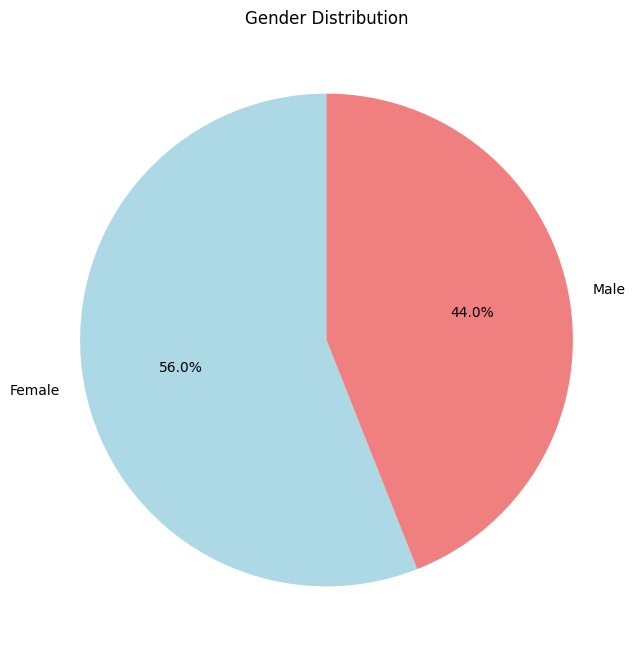

In [8]:

gender_counts = data['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


The dataset consists of 56% female and 44% male

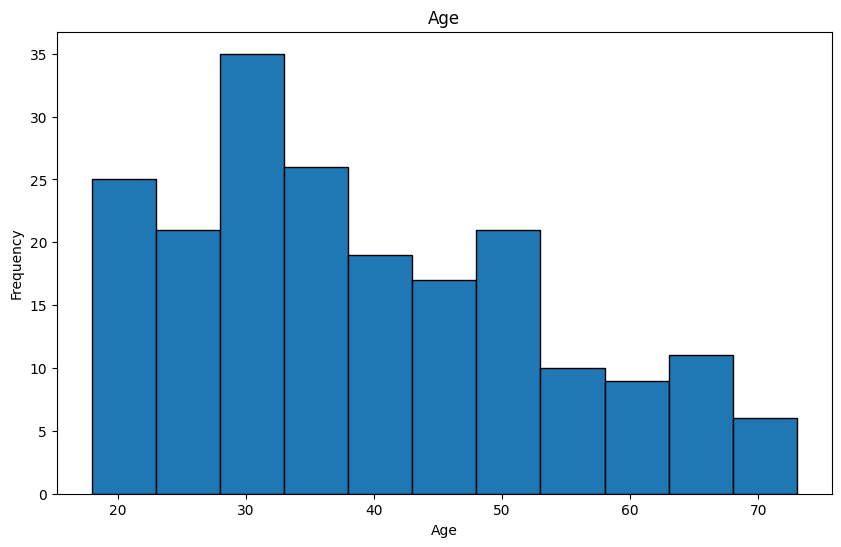

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=range(min(data['Age']), max(data['Age']) + 6, 5), edgecolor='black')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Most of the people fall under the age group of 28 to 33 years

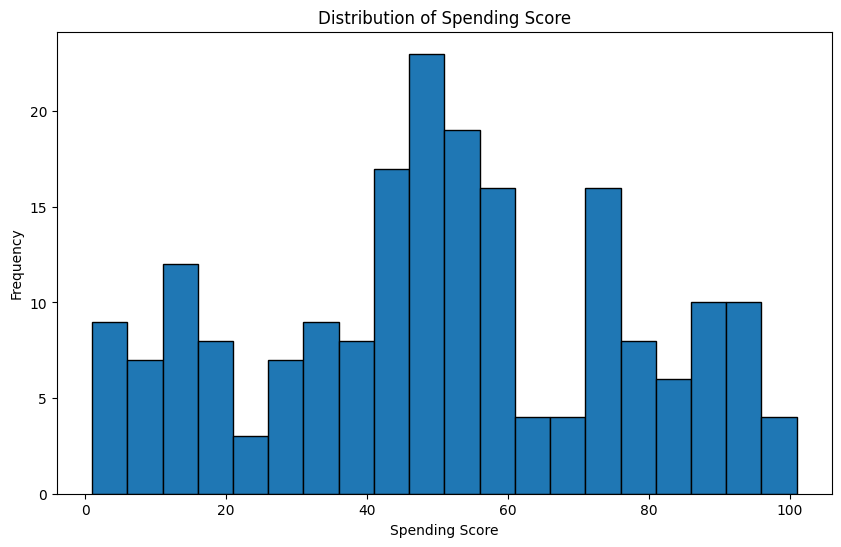

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(data['Spending Score (1-100)'], bins=range(min(data['Spending Score (1-100)']), max(data['Spending Score (1-100)']) + 6, 5), edgecolor='black')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

Most of people buy products of score which ranges between 46 to 51

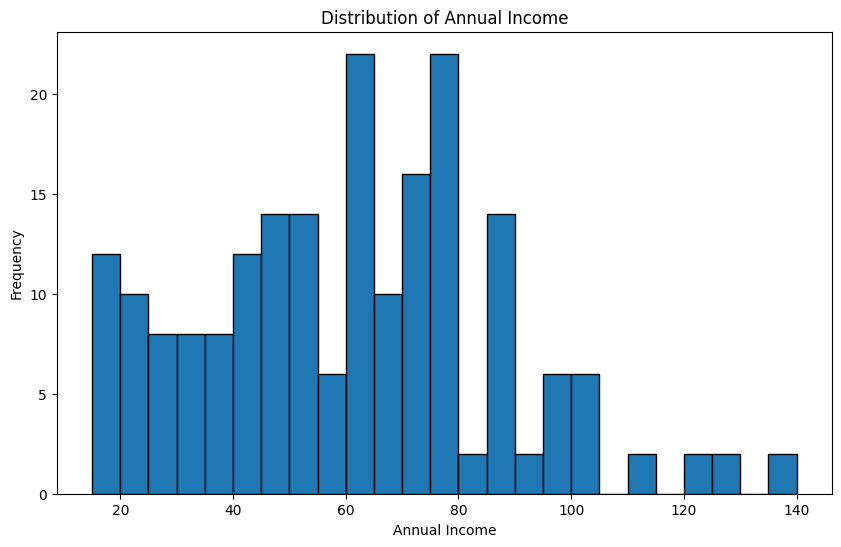

In [11]:

plt.figure(figsize=(10, 6))
plt.hist(data['Annual Income (k$)'], bins=range(min(data['Annual Income (k$)']), max(data['Annual Income (k$)']) + 6, 5), edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

- Most of people have annual income ranging between 60k$ to 65 k$ and 75k$ to 80k$.
- There are very less number of people whose annual income is greater than 100k$.

## Bivariate Analysis

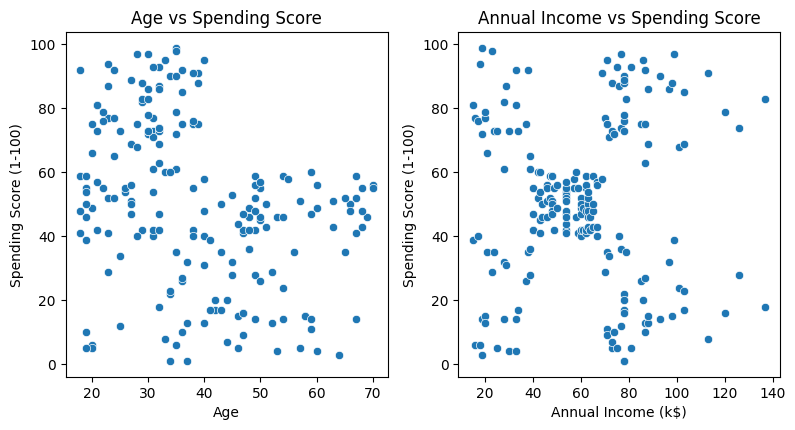

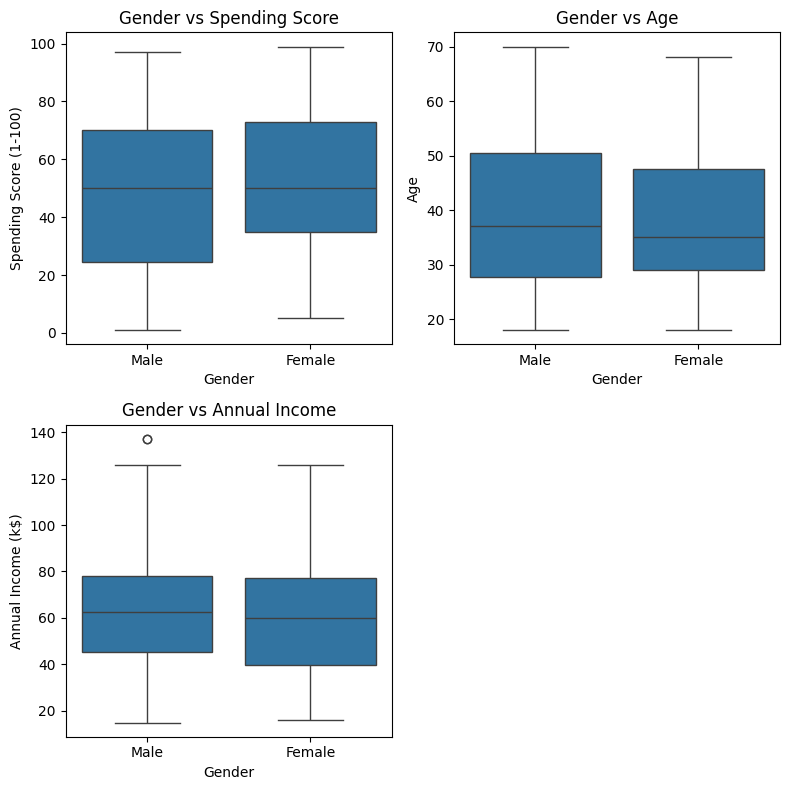

In [12]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data)
plt.title('Age vs Spending Score')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income vs Spending Score')


plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Gender vs Spending Score')

plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Gender vs Age')

plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Gender vs Annual Income')

plt.tight_layout()
plt.show()

- As age increases spending score decreases very slightly
- Female have slightly higher spending score as compared to male.
- Female and male have almost equal annual income
- Male have slightly higher age as compared to female

### Correlation Analysis


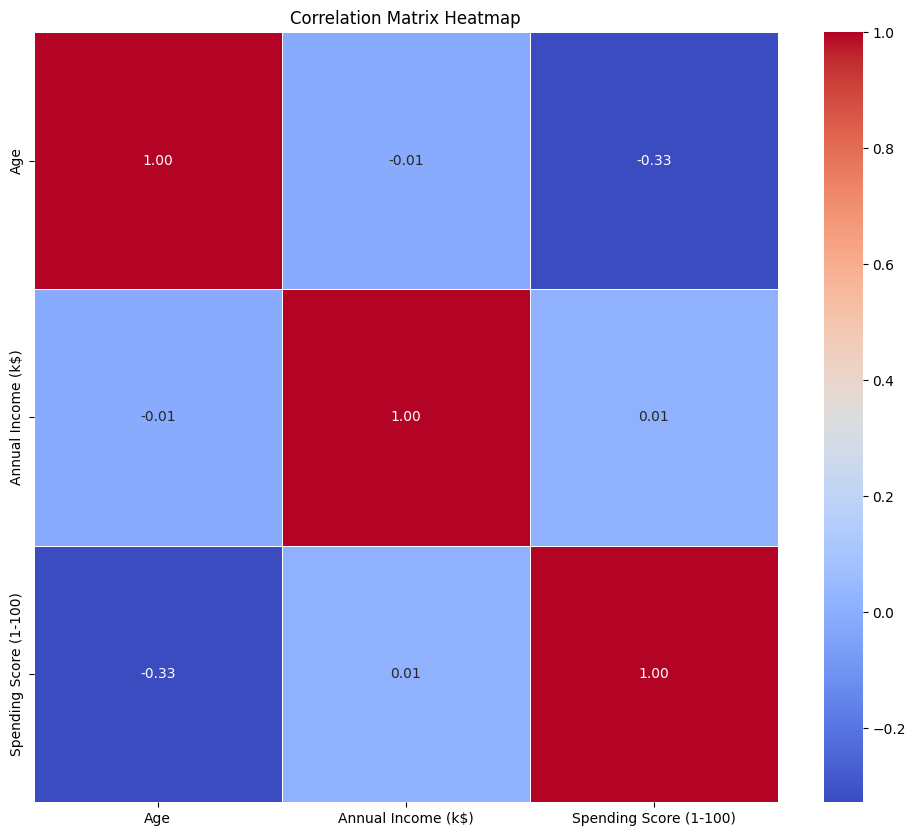

In [13]:
numerical_columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

correlation_matrix = data[numerical_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There are no correlated features

## Detection Of Outliers

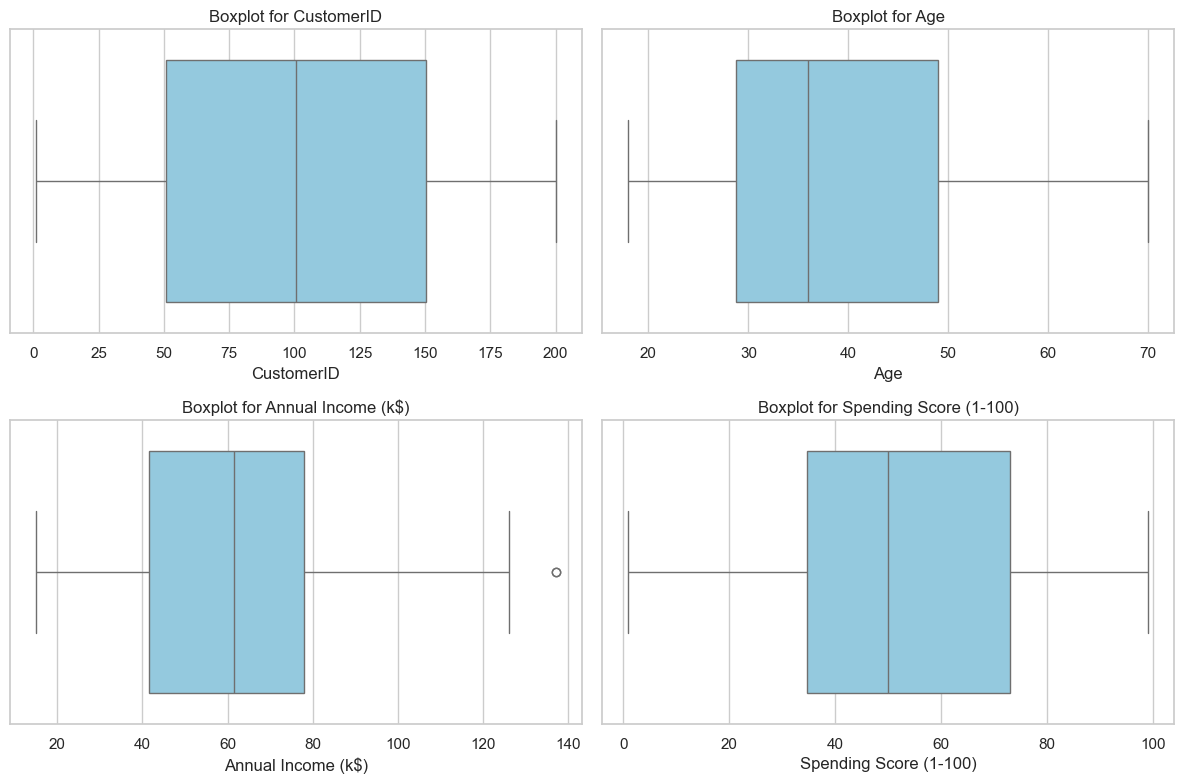

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for column in numerical_columns:
    plt.subplot(2, 2, numerical_columns.get_loc(column) + 1)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


There is one outlier in Annual Income column